In [325]:
#--------------------------------------------------------------------------------------------
# Rutgers Fintech Project-2 task is to develop a Trading Algorithm in Python to automatically 
# execute Buy/Sell orders based on a defined trading strategy.
# 
# This submission implements 3 different Trading Strategies and compares the Cumulative Returns of each.
# The 1st strategy relies on ML, whereas the other 2 are rudimentary 'Moving Averages' and 'Buy on Dips, Sell on Highs".
# The commodity being bought/sold is Ethereum (ETH).
# 
# Each of the 3 Trading Strategy implmentations follow a similar pattern:
#  1. Gather Data: We will be using historical price data downloaded from BINANCE (by Justin)
#  2. Preprocess the Data: E.g., drop Nulls and irrelevant columns (if any) using Pandas; will be using Supervised Learning and hence no splittting of testing/test data
#  3. Build a Predictive Model: [Done for Strategy #1] Fit the model to the data; train it to make predictions about Ethereum prices based on past performance.
#  4. Implement the Trading Strategy: Write code to implement specific trading strategy, using the predictions from model to decide when to buy/sell Ethereum.
#  5. Test the strategy: [Done for Strategy #1] Evaluate the trained model and see how well it performs by simulating trading strategy on historical data (backtesting).
#     Show the predictions by using a sample of new data (NA).
#  6. Compare the Cumulative Returns when more than one Trading Strategy is used.
#  7. TODO: Use one new Machine Learning library OR Machine Learning model OR Evaluation Metric that hasn't been covered in class.
#--------------------------------------------------------------------------------------------

In [326]:
# import all required Python libraries
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.cluster import KMeans
from finta import TA

In [327]:
# Import historical Ethereum prices (earlier downloaded from BINANCE via APIs) into a dataframe
from pathlib import Path
filepath="./Resources/eth.csv"
eth_df = pd.read_csv(
    Path(filepath), 
    index_col='time', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the newly-created dataframe
eth_df

,open,high,low,close,volume
time,,,,,
2019-09-23 23:59:59.999,209.55,209.55,209.55,209.55,0.01000
2019-09-24 23:59:59.999,195.50,195.50,152.56,167.09,2224.36708
2019-09-25 23:59:59.999,166.84,174.15,163.18,170.00,181.60286
2019-09-26 23:59:59.999,169.95,170.77,153.07,166.69,545.45350
2019-09-27 23:59:59.999,166.34,175.54,161.44,173.69,630.91688
...,...,...,...,...,...
2022-11-27 23:59:59.999,1205.19,1223.05,1189.13,1193.83,654.26480
2022-11-28 23:59:59.999,1194.92,1198.52,1151.39,1168.13,1260.68583
2022-11-29 23:59:59.999,1167.25,1225.00,1158.51,1216.37,1504.19549


In [328]:
signals_df = eth_df.loc[:,['close']]
signals_df['actual returns'] = signals_df['close'].pct_change()
signals_df = signals_df.dropna()

# Review the updated dataframe
signals_df

,close,actual returns
time,,
2019-09-24 23:59:59.999,167.09,-0.202625
2019-09-25 23:59:59.999,170.00,0.017416
2019-09-26 23:59:59.999,166.69,-0.019471
2019-09-27 23:59:59.999,173.69,0.041994
2019-09-28 23:59:59.999,172.84,-0.004894
...,...,...
2022-11-27 23:59:59.999,1193.83,-0.009204
2022-11-28 23:59:59.999,1168.13,-0.021527
2022-11-29 23:59:59.999,1216.37,0.041297


In [329]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model and make Predictions
model.fit(signals_df)
k_predictions = model.predict(signals_df)

# Create a copy of the dataframe
signals_df_predictions = signals_df.copy()

# Add a class column with the labels
signals_df_predictions['cluster'] = k_predictions

In [330]:
# Initialize the new Strategy column
signals_df['strategy'] = 0

# Codify Strategy to 'Buy' - buy when ???; need to check with Alpha on defined value -0.021
signals_df.loc[(signals_df['actual returns'] <= -0.021), 'strategy'] = 1

# Codify Strategy to 'Sell' - sell when ???; need to check with Alpha on defined value -0.021
signals_df.loc[(signals_df['actual returns'] >= 0.028), 'strategy'] = -1

# Review the updated dataframe
signals_df

,close,actual returns,strategy
time,,,
2019-09-24 23:59:59.999,167.09,-0.202625,1
2019-09-25 23:59:59.999,170.00,0.017416,0
2019-09-26 23:59:59.999,166.69,-0.019471,0
2019-09-27 23:59:59.999,173.69,0.041994,-1
2019-09-28 23:59:59.999,172.84,-0.004894,0
...,...,...,...
2022-11-27 23:59:59.999,1193.83,-0.009204,0
2022-11-28 23:59:59.999,1168.13,-0.021527,1
2022-11-29 23:59:59.999,1216.37,0.041297,-1


In [331]:
# signals_df['actual returns'].min()
# signals_df['actual returns'].max()
# signals_df['actual returns'].mean()

In [332]:
signals_df['strategy returns'] = signals_df['actual returns'] * signals_df['strategy'].shift()
signals_df = signals_df.dropna()

# Review the updated dataframe
signals_df

,close,actual returns,strategy,strategy returns
time,,,,
2019-09-25 23:59:59.999,170.00,0.017416,0,0.017416
2019-09-26 23:59:59.999,166.69,-0.019471,0,-0.000000
2019-09-27 23:59:59.999,173.69,0.041994,-1,0.000000
2019-09-28 23:59:59.999,172.84,-0.004894,0,0.004894
2019-09-29 23:59:59.999,169.46,-0.019556,0,-0.000000
...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,-0.009204,0,-0.000000
2022-11-28 23:59:59.999,1168.13,-0.021527,1,-0.000000
2022-11-29 23:59:59.999,1216.37,0.041297,-1,0.041297


In [333]:
%%capture --no-display
# the above line suppresses Warning messages in the output window for this cell

# Store 'Cumulative Returns' after Strategy execution, and store in new column; will be used for Plot
signals_df['cumulative_returns'] = signals_df['strategy returns'].cumsum()

# Review the updated dataframe
signals_df

,close,actual returns,strategy,strategy returns,cumulative_returns
time,,,,,
2019-09-25 23:59:59.999,170.00,0.017416,0,0.017416,0.017416
2019-09-26 23:59:59.999,166.69,-0.019471,0,-0.000000,0.017416
2019-09-27 23:59:59.999,173.69,0.041994,-1,0.000000,0.017416
2019-09-28 23:59:59.999,172.84,-0.004894,0,0.004894,0.022310
2019-09-29 23:59:59.999,169.46,-0.019556,0,-0.000000,0.022310
...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,-0.009204,0,-0.000000,2.256522
2022-11-28 23:59:59.999,1168.13,-0.021527,1,-0.000000,2.256522
2022-11-29 23:59:59.999,1216.37,0.041297,-1,0.041297,2.297818


<AxesSubplot:xlabel='time'>

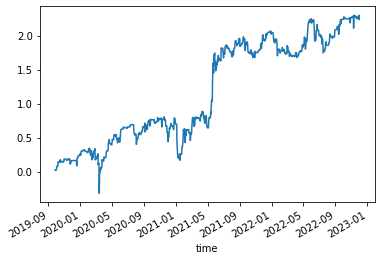

In [334]:
# Plot the Cumulative Returns of the strategy
signals_df['cumulative_returns'].plot()

In [335]:
# This section of the project calculates 2 Moving Averages (50-day & 200-day) and 
# a %-age change in Price over the past 10 days and then implements a Buy/Sell Trading Strategy 
# based on the 'crossover' of the Moving Averages and the 'direction' of the price change.
# It then calculates the returns of the strategy and graphically plots the Cumulative Returns.

In [336]:
# Reload the Ethereum pricing data (earlier downloaded from BINANCE via APIs) and reset the 'signals' dataframe
filepath="./Resources/eth.csv"
eth_df = pd.read_csv(
    Path(filepath), 
    index_col='time', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the new dataframe
# eth_df

signals_df = eth_df.loc[:,['close']]
signals_df = signals_df.dropna()

# Review the updated dataframe
signals_df

,close
time,
2019-09-23 23:59:59.999,209.55
2019-09-24 23:59:59.999,167.09
2019-09-25 23:59:59.999,170.00
2019-09-26 23:59:59.999,166.69
2019-09-27 23:59:59.999,173.69
...,...
2022-11-27 23:59:59.999,1193.83
2022-11-28 23:59:59.999,1168.13
2022-11-29 23:59:59.999,1216.37


In [337]:
# Calculate the Moving Average for the past 50 days
signals_df['ma_50'] = signals_df['close'].rolling(window=50).mean()

# Review the updated dataframe
signals_df

,close,ma_50
time,,
2019-09-23 23:59:59.999,209.55,NaN
2019-09-24 23:59:59.999,167.09,NaN
2019-09-25 23:59:59.999,170.00,NaN
2019-09-26 23:59:59.999,166.69,NaN
2019-09-27 23:59:59.999,173.69,NaN
...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520
2022-11-28 23:59:59.999,1168.13,1337.3610
2022-11-29 23:59:59.999,1216.37,1335.8730


In [338]:
# Calculate the Moving Average for the past 200 days
signals_df['ma_200'] = signals_df['close'].rolling(window=200).mean()

# Review the updated dataframe
signals_df

,close,ma_50,ma_200
time,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN
2019-09-24 23:59:59.999,167.09,NaN,NaN
2019-09-25 23:59:59.999,170.00,NaN,NaN
2019-09-26 23:59:59.999,166.69,NaN,NaN
2019-09-27 23:59:59.999,173.69,NaN,NaN
...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445


In [339]:
# Create a column that indicates whether the 50-day Moving Average is 'above' the 200-day Moving Average
signals_df['ma_cross'] = signals_df['ma_50'] > signals_df['ma_200']

# Review the updated dataframe
signals_df

,close,ma_50,ma_200,ma_cross
time,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,False
2019-09-24 23:59:59.999,167.09,NaN,NaN,False
2019-09-25 23:59:59.999,170.00,NaN,NaN,False
2019-09-26 23:59:59.999,166.69,NaN,NaN,False
2019-09-27 23:59:59.999,173.69,NaN,NaN,False
...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700,False
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515,False
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445,False


In [340]:
# Calculate the % change in Price over the past 10 days
signals_df['price_change'] = signals_df['close'].pct_change(periods=10)

# Review the updated dataframe
signals_df

,close,ma_50,ma_200,ma_cross,price_change
time,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,False,NaN
2019-09-24 23:59:59.999,167.09,NaN,NaN,False,NaN
2019-09-25 23:59:59.999,170.00,NaN,NaN,False,NaN
2019-09-26 23:59:59.999,166.69,NaN,NaN,False,NaN
2019-09-27 23:59:59.999,173.69,NaN,NaN,False,NaN
...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700,False,-0.005299
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515,False,-0.037150
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445,False,-0.001289


In [341]:
# Create a column that indicates whether the Price has increased over the past 10 days
signals_df['price_up'] = signals_df['price_change'] > 0

# Review the updated dataframe
signals_df

,close,ma_50,ma_200,ma_cross,price_change,price_up
time,,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,False,NaN,False
2019-09-24 23:59:59.999,167.09,NaN,NaN,False,NaN,False
2019-09-25 23:59:59.999,170.00,NaN,NaN,False,NaN,False
2019-09-26 23:59:59.999,166.69,NaN,NaN,False,NaN,False
2019-09-27 23:59:59.999,173.69,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700,False,-0.005299,False
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515,False,-0.037150,False
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445,False,-0.001289,False


In [342]:
# Codify Trading Strategy based on the Moving_Average_Cross and the Price_Change
signals_df['strategy'] = (signals_df['ma_cross'] & signals_df['price_up']).astype(int)

# Review the updated dataframe
signals_df

,close,ma_50,ma_200,ma_cross,price_change,price_up,strategy
time,,,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,False,NaN,False,0
2019-09-24 23:59:59.999,167.09,NaN,NaN,False,NaN,False,0
2019-09-25 23:59:59.999,170.00,NaN,NaN,False,NaN,False,0
2019-09-26 23:59:59.999,166.69,NaN,NaN,False,NaN,False,0
2019-09-27 23:59:59.999,173.69,NaN,NaN,False,NaN,False,0
...,...,...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700,False,-0.005299,False,0
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515,False,-0.037150,False,0
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445,False,-0.001289,False,0


In [343]:
# Calculate the returns of the strategy and store in new column 'returns'
signals_df['returns'] = signals_df['close'].pct_change() * signals_df['strategy']

# Store Cumulative Returns of the strategy and store in new column; will be used for Plot
signals_df['cumulative_returns'] = signals_df['returns'].cumsum()

# Review the updated dataframe
signals_df

,close,ma_50,ma_200,ma_cross,price_change,price_up,strategy,returns,cumulative_returns
time,,,,,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,False,NaN,False,0,NaN,NaN
2019-09-24 23:59:59.999,167.09,NaN,NaN,False,NaN,False,0,-0.0,0.000000
2019-09-25 23:59:59.999,170.00,NaN,NaN,False,NaN,False,0,0.0,0.000000
2019-09-26 23:59:59.999,166.69,NaN,NaN,False,NaN,False,0,-0.0,0.000000
2019-09-27 23:59:59.999,173.69,NaN,NaN,False,NaN,False,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1340.4520,1487.88700,False,-0.005299,False,0,-0.0,5.191253
2022-11-28 23:59:59.999,1168.13,1337.3610,1483.93515,False,-0.037150,False,0,-0.0,5.191253
2022-11-29 23:59:59.999,1216.37,1335.8730,1479.98445,False,-0.001289,False,0,0.0,5.191253


<AxesSubplot:xlabel='time'>

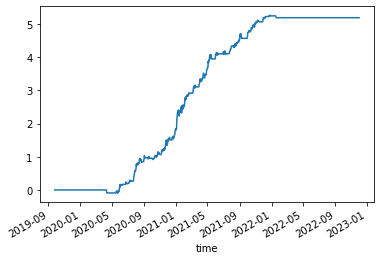

In [344]:
# Plot the Cumulative Returns of the strategy
signals_df['cumulative_returns'].plot()

In [345]:
# This section will attempt another Trading Strategy of "Buy on Dips, Sell on Highs" strategy
# We'll first calculate the rolling maximum and minimum over the past 10 days, and a % change in price over the past 10 days. 
# It then executes the trading strategy and calculates the returns of the strategy.
# Finally, it graphically plots the Cumulative Returns.

# Reload the Ethereum pricing data (earlier downloaded from BINANCE via APIs) and reset the 'signals' dataframe
filepath="./Resources/eth.csv"
eth_df = pd.read_csv(
    Path(filepath), 
    index_col='time', 
    infer_datetime_format=True, 
    parse_dates=True
)

signals_df = eth_df.loc[:,['close']]
signals_df = signals_df.dropna()

# Review the dataframe
signals_df

,close
time,
2019-09-23 23:59:59.999,209.55
2019-09-24 23:59:59.999,167.09
2019-09-25 23:59:59.999,170.00
2019-09-26 23:59:59.999,166.69
2019-09-27 23:59:59.999,173.69
...,...
2022-11-27 23:59:59.999,1193.83
2022-11-28 23:59:59.999,1168.13
2022-11-29 23:59:59.999,1216.37


In [346]:
# Calculate the Rolling Maximum and Minimum over the past 10 days
signals_df['max10'] = signals_df['close'].rolling(window=10).max()
signals_df['min10'] = signals_df['close'].rolling(window=10).min()

In [347]:
# Calculate the % change in Price over the past 10 days
signals_df['price_change'] = signals_df['close'].pct_change(periods=10)

# Review the updated dataframe
signals_df

,close,max10,min10,price_change
time,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,NaN
2019-09-24 23:59:59.999,167.09,NaN,NaN,NaN
2019-09-25 23:59:59.999,170.00,NaN,NaN,NaN
2019-09-26 23:59:59.999,166.69,NaN,NaN,NaN
2019-09-27 23:59:59.999,173.69,NaN,NaN,NaN
...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1217.94,1109.36,-0.005299
2022-11-28 23:59:59.999,1168.13,1217.94,1109.36,-0.037150
2022-11-29 23:59:59.999,1216.37,1216.37,1109.36,-0.001289


In [348]:
# Create a column that indicates whether the Price has 'increased' over the past 10 days
signals_df['price_up'] = signals_df['price_change'] > 0

# Review the updated dataframe
signals_df

,close,max10,min10,price_change,price_up
time,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,NaN,False
2019-09-24 23:59:59.999,167.09,NaN,NaN,NaN,False
2019-09-25 23:59:59.999,170.00,NaN,NaN,NaN,False
2019-09-26 23:59:59.999,166.69,NaN,NaN,NaN,False
2019-09-27 23:59:59.999,173.69,NaN,NaN,NaN,False
...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1217.94,1109.36,-0.005299,False
2022-11-28 23:59:59.999,1168.13,1217.94,1109.36,-0.037150,False
2022-11-29 23:59:59.999,1216.37,1216.37,1109.36,-0.001289,False


In [349]:
# Codify a Trading Strategy based on the "Buy on Dips, Sell on Highs" principle
signals_df['strategy'] = (signals_df['close'] == signals_df['min10']) | (signals_df['close'] == signals_df['max10'])

# Review the updated dataframe
signals_df

,close,max10,min10,price_change,price_up,strategy
time,,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,NaN,False,False
2019-09-24 23:59:59.999,167.09,NaN,NaN,NaN,False,False
2019-09-25 23:59:59.999,170.00,NaN,NaN,NaN,False,False
2019-09-26 23:59:59.999,166.69,NaN,NaN,NaN,False,False
2019-09-27 23:59:59.999,173.69,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1217.94,1109.36,-0.005299,False,False
2022-11-28 23:59:59.999,1168.13,1217.94,1109.36,-0.037150,False,False
2022-11-29 23:59:59.999,1216.37,1216.37,1109.36,-0.001289,False,True


In [350]:
# Calculate the returns of the strategy execution
signals_df['returns'] = signals_df['close'].pct_change() * signals_df['strategy']
signals_df['cumulative_returns'] = signals_df['returns'].cumsum()

# Review the updated dataframe
signals_df

,close,max10,min10,price_change,price_up,strategy,returns,cumulative_returns
time,,,,,,,,
2019-09-23 23:59:59.999,209.55,NaN,NaN,NaN,False,False,NaN,NaN
2019-09-24 23:59:59.999,167.09,NaN,NaN,NaN,False,False,-0.000000,0.000000
2019-09-25 23:59:59.999,170.00,NaN,NaN,NaN,False,False,0.000000,0.000000
2019-09-26 23:59:59.999,166.69,NaN,NaN,NaN,False,False,-0.000000,0.000000
2019-09-27 23:59:59.999,173.69,NaN,NaN,NaN,False,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2022-11-27 23:59:59.999,1193.83,1217.94,1109.36,-0.005299,False,False,-0.000000,2.859272
2022-11-28 23:59:59.999,1168.13,1217.94,1109.36,-0.037150,False,False,-0.000000,2.859272
2022-11-29 23:59:59.999,1216.37,1216.37,1109.36,-0.001289,False,True,0.041297,2.900568


<AxesSubplot:xlabel='time'>

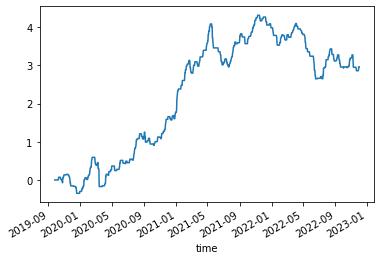

In [351]:
# Plot the Cumulative Returns of this 3rd Trading Strategy
signals_df['cumulative_returns'].plot()